In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Цены в рублях выражены курсом на 04.09.2023:

1$ = 96 руб. 50 коп.

In [11]:
reviews = pd.read_csv('wine_reviews.csv', index_col='id')

In [25]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [26]:
reviews.shape

(129971, 13)

In [28]:
reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [38]:
reviews['ruble_price'] = reviews['price'] * 96.5

In [49]:
reviews.variety.value_counts().head(10)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

5 самых популярных сортов вина:

1) Red Blend
2) Pinot Noir
3) Chardonnay
4) Cabernet Sauvignon
5) Riesling


In [61]:
score_by_country = reviews \
    .groupby('country', as_index=False) \
    .agg({'points': 'mean', 'title': 'count'}) \
    .rename(columns={'points': 'avg_points', 'title': 'quantity'}) \
    .sort_values('avg_points', ascending=False)

In [90]:
top_5_countries = score_by_country \
    .query('quantity > 1000') \
    .round(2) \
    .head(5)
top_5_countries

,country,avg_points,quantity
3,Austria,90.10,3345
17,Germany,89.85,2165
15,France,88.85,22093
2,Australia,88.58,2329
40,US,88.56,54504


5 стран с лучшими винами:
    
1) Austria 	90.10 
2) Germany 	89.85 
3) France 	88.85 
4) Australia 	88.58 
5) US 	88.56 

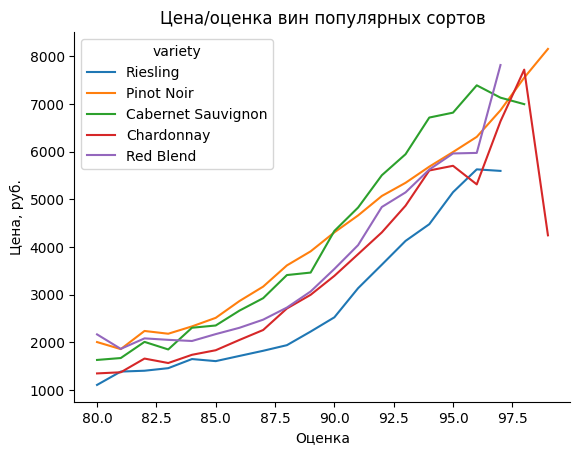

In [104]:
variety_price_top5_chart = sns.lineplot(x='points', \
             y='ruble_price', \
             data=reviews.query('price < 100'), \
             hue=reviews.query('variety in ["Red Blend", "Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Riesling"]').variety, \
             err_style=None)
variety_price_top5_chart.set(xlabel='Оценка', ylabel='Цена, руб.')
sns.despine()
plt.title('Цена/оценка вин популярных сортов')
plt.show()

In [120]:
reviews[['variety', 'ruble_price', 'points']] \
    .query('variety in ["Red Blend", "Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Riesling"]') \
    .groupby('variety') \
    .describe() \
    .round(2)

ruble_price                                           \
                         count     mean      std    min     25%     50%   
variety                                                                   
Cabernet Sauvignon      9386.0  4626.21  3971.67  386.0  1930.0  3570.5   
Chardonnay             11080.0  3331.38  4076.65  386.0  1737.0  2509.0   
Pinot Noir             12787.0  4586.54  4594.31  482.5  2702.0  4053.0   
Red Blend               8476.0  3462.54  2925.69  482.5  1737.0  2702.0   
Riesling                4972.0  3088.04  4155.41  482.5  1544.0  2123.0   

                                       points                                 \
                       75%       max    count   mean   std   min   25%   50%   
variety                                                                        
Cabernet Sauvignon  6272.5   60312.5   9472.0  88.61  3.32  80.0  86.0  88.0   
Chardonnay          3860.0  194254.5  11753.0  88.34  3.23  80.0  86.0  88.0   
Pinot Noir          5307.5  241250.0  13272.0  89.41  3.12  80.0  87.0  90.0   
Red Blend           4342.5   48250.0   8946.0  88.38  2.78  80.0  87.0  88.0   
Riesling            3281.0   74787.5   5189.0  89.45  2.86  80.0  87.0  90.0   

                                 
                     75%    max  
variety                          
Cabernet Sauvignon  91.0  100.0  
Chardonnay          91.0  100.0  
Pinot Noir          92.0   99.0  
Red Blend           90.0   99.0  
Riesling            91.0   98.0